In [5]:
import os
import json
import matplotlib.pyplot as plt

In [11]:
# Move one directory up from the current working directory
base_dir = os.path.dirname(os.getcwd())

# Path to the scraped_issues directory
scraped_issues_dir = os.path.join(base_dir, "scraped_issues")

# Counters
count_issues_without_pr = 0
count_issues_with_pr = 0
count_merged_prs = 0
count_unmerged_prs = 0
count_issues_closed_without_prs = 0
count_issues_assigned_to_bot = 0
count_issues_closed_by_bot = 0
count_issues_not_PR_closed_by_bot = 0
count_issues_with_pr_closed_by_bot = 0
count_issues_opened_by_bot = 0
count_prs_merged_by_bot = 0
count_prs_merged_without_comments = 0
count_issues_that_has_comments = 0

count_comments = {}

# Loop through all JSON files in the directory
for filename in os.listdir(scraped_issues_dir):
    if filename.endswith(".json"):
        filepath = os.path.join(scraped_issues_dir, filename)
        try:
            with open(filepath, "r") as f:
                issues = json.load(f)
                for issue in issues:
                    is_pr = "pull_request" in issue
                    if int(issue["comments"]) > 0:
                        count_issues_that_has_comments += 1
                    if issue["closed_by"]["type"] == "Bot":
                        count_issues_closed_by_bot += 1                       
                    comment_int = int(issue["comments"])
                    if comment_int in count_comments:
                        count_comments[comment_int] += 1  # Increment count
                    else:
                        count_comments[comment_int] = 1  # Initialize count

                    
                    # Count PRs vs Issues
                    if is_pr:
                        count_issues_with_pr += 1
                        # Opened by a Bot
                        if issue["user"]["type"] == "Bot":
                            count_issues_opened_by_bot += 1
                        # Closed by a Bot
                        if issue["closed_by"]["type"] == "Bot":
                            count_issues_with_pr_closed_by_bot += 1
                        # For merged or not
                        if issue["pull_request"]["merged_at"] is not None:
                            count_merged_prs += 1
                        else:
                            count_unmerged_prs += 1
                        
                    else:
                        count_issues_without_pr += 1  # This is a regular issue
                        count_issues_closed_without_prs += 1  # Issue closed without PR
                        if issue["closed_by"]["type"] == "Bot":
                            count_issues_not_PR_closed_by_bot += 1

        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Printing data: 
total_issues = count_issues_with_pr + count_issues_without_pr
print("Number of Issues: ", total_issues)
print("Number of Issues (also a PR): ", count_issues_with_pr)
print("Number of Issues (not a PR): ", count_issues_without_pr)
print("Percent of Issues that is a PR", (count_issues_with_pr / (total_issues))*100, "%")
print("Percent of Issues closed by a Bot", (count_issues_closed_by_bot / total_issues)*100, "%")
print("Percent of Issues (with PRs) closed by a Bot", (count_issues_with_pr_closed_by_bot / count_issues_with_pr)*100, "%")
print("Percent of Issues (not PRs) closed by a Bot", (count_issues_not_PR_closed_by_bot / count_issues_without_pr)*100, "%")
print("Percent of PRs that are not merged", (count_unmerged_prs / count_issues_with_pr)*100, "%")
print("Percent of issues that has comments: ", (count_issues_that_has_comments/total_issues)*100, "%")

Error reading issues_batch10.json: 'NoneType' object is not subscriptable
Error reading issues_batch12.json: 'NoneType' object is not subscriptable
Error reading issues_batch13.json: 'NoneType' object is not subscriptable
Error reading issues_batch14.json: 'NoneType' object is not subscriptable
Error reading issues_batch15.json: 'NoneType' object is not subscriptable
Error reading issues_batch19.json: 'NoneType' object is not subscriptable
Error reading issues_batch4.json: 'NoneType' object is not subscriptable
Error reading issues_batch7.json: 'NoneType' object is not subscriptable
Error reading issues_batch8.json: 'NoneType' object is not subscriptable
Number of Issues:  16483
Number of Issues (also a PR):  13021
Number of Issues (not a PR):  3462
Percent of Issues that is a PR 78.99654189164593 %
Percent of Issues closed by a Bot 63.88400169871989 %
Percent of Issues (with PRs) closed by a Bot 76.03870670455419 %
Percent of Issues (not PRs) closed by a Bot 18.168688619295207 %
Perce

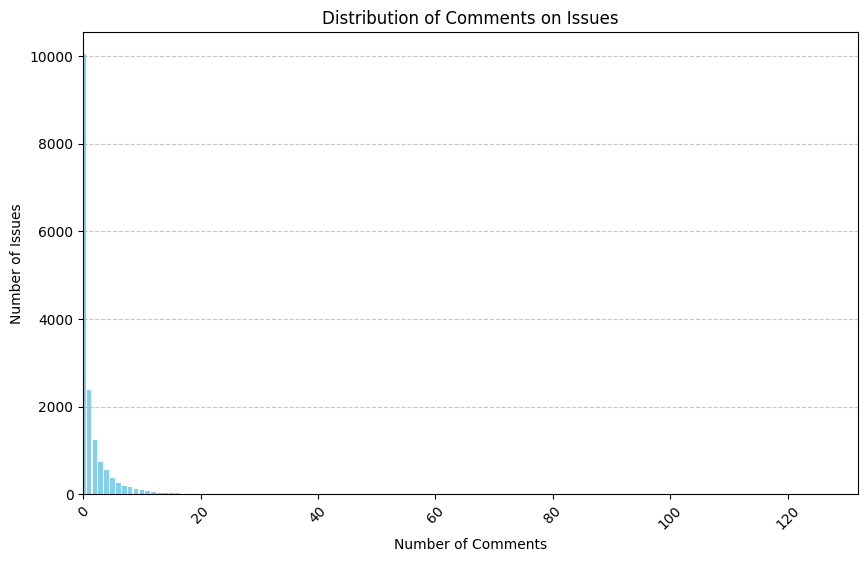

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(list(count_comments.keys()), list(count_comments.values()), color='skyblue')
plt.xlabel("Number of Comments")
plt.ylabel("Number of Issues")
plt.title("Distribution of Comments on Issues")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()